In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# 価格を生成する関数
def create_price(M, d):
    price = np.random.randint(d, 3 * d, size=M)
    return price

In [3]:
# alphaを作成する関数
def alpha_star(M):
    alpha_star = np.random.normal(0, 1, size=M)
    return alpha_star

In [4]:
# betaを作成する関数
def beta_star(M, M_prime):
    beta_star = np.random.normal(0, 1, size=(M, M_prime, 3))
    return beta_star

In [5]:
# phi関数
def phi(price, beta):
    phi = beta[0] * price + beta[1] * price**2 + beta[2] * (1 / price)
    return phi

In [6]:
M = 50
# このデータにおけるalpha,betaを作成
alpha = alpha_star(M)
beta = beta_star(M, M)

In [7]:
sigma = 1
# 価格を入れるリストを作成
price_list = []
# 量を入れるリストを作成
quantity_list = []
for i in range(10000):
    price = create_price(M, 100)
    price_list.append(price)
    quantity = []
    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])
        quantity.append(alpha[m] + sum_beta + np.random.normal(0, sigma, size=1))
    quantity_list.append(sum(quantity))

In [8]:
# 列名の作成
column_names = [f"prodact_{i+1}" for i in range(50)]

In [9]:
# データフレームの作成
df_price = pd.DataFrame(price_list, columns=column_names)

In [10]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_41,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50
0,216,163,130,149,108,149,281,123,185,278,...,200,109,114,224,287,191,129,231,266,190
1,137,243,283,161,292,214,154,124,108,184,...,141,188,247,250,177,189,253,118,191,138
2,128,150,281,133,179,231,204,269,176,160,...,202,187,202,264,288,110,224,183,289,193
3,196,287,280,182,193,154,188,147,161,194,...,201,129,224,203,255,244,158,298,133,284
4,189,256,162,103,204,281,172,185,235,297,...,155,224,246,126,229,247,146,208,276,256


In [11]:
# 売上の追加
df_price["sales"] = quantity_list

In [12]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,216,163,130,149,108,149,281,123,185,278,...,109,114,224,287,191,129,231,266,190,[-2523459.680177107]
1,137,243,283,161,292,214,154,124,108,184,...,188,247,250,177,189,253,118,191,138,[-775767.8983645915]
2,128,150,281,133,179,231,204,269,176,160,...,187,202,264,288,110,224,183,289,193,[-887098.6139657393]
3,196,287,280,182,193,154,188,147,161,194,...,129,224,203,255,244,158,298,133,284,[-553131.2373967052]
4,189,256,162,103,204,281,172,185,235,297,...,224,246,126,229,247,146,208,276,256,[235857.99834298878]


In [13]:
# 売上をfloat型に変換
df_price["sales"] = df_price["sales"].astype(float)

In [14]:
# 確認
df_price.dtypes

prodact_1       int32
prodact_2       int32
prodact_3       int32
prodact_4       int32
prodact_5       int32
prodact_6       int32
prodact_7       int32
prodact_8       int32
prodact_9       int32
prodact_10      int32
prodact_11      int32
prodact_12      int32
prodact_13      int32
prodact_14      int32
prodact_15      int32
prodact_16      int32
prodact_17      int32
prodact_18      int32
prodact_19      int32
prodact_20      int32
prodact_21      int32
prodact_22      int32
prodact_23      int32
prodact_24      int32
prodact_25      int32
prodact_26      int32
prodact_27      int32
prodact_28      int32
prodact_29      int32
prodact_30      int32
prodact_31      int32
prodact_32      int32
prodact_33      int32
prodact_34      int32
prodact_35      int32
prodact_36      int32
prodact_37      int32
prodact_38      int32
prodact_39      int32
prodact_40      int32
prodact_41      int32
prodact_42      int32
prodact_43      int32
prodact_44      int32
prodact_45      int32
prodact_46

In [15]:
# salesを整数に変換四捨五入
df_price["sales"] = df_price["sales"].round()

In [16]:
# データの確認
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,216,163,130,149,108,149,281,123,185,278,...,109,114,224,287,191,129,231,266,190,-2523460.0
1,137,243,283,161,292,214,154,124,108,184,...,188,247,250,177,189,253,118,191,138,-775768.0
2,128,150,281,133,179,231,204,269,176,160,...,187,202,264,288,110,224,183,289,193,-887099.0
3,196,287,280,182,193,154,188,147,161,194,...,129,224,203,255,244,158,298,133,284,-553131.0
4,189,256,162,103,204,281,172,185,235,297,...,224,246,126,229,247,146,208,276,256,235858.0


In [17]:
X = df_price[column_names]

In [18]:
Y = df_price["sales"]

In [19]:
# XとYを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
# モデルの作成
lr = LinearRegression()

In [21]:
# テストデータを用いてモデルを学習
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
# テストデータを用いて予測
Y_pred = lr.predict(X_test)

In [23]:
# 予測結果の精度を確認
print(mean_squared_error(Y_test, Y_pred))

18595895582.925266


In [24]:
# モデルの係数を確認
lr.coef_

array([ 1470.35170966,  -667.53809769,  4925.42455021, -3227.4545587 ,
        1389.1665515 ,  1939.87590573, -1176.09392136, -3179.04226332,
        -279.33521967,   661.47035549, -6177.0884661 , -2639.89997744,
       -2474.62532922,   899.6065399 , -1477.93739688, -1229.24790595,
       -3767.83245567, -1148.04195204,   396.14647853,  2384.62637885,
        1920.10682594, -1145.71502783,   792.40488438,  1344.44720959,
        3148.50878786,  -909.45674659, -3913.8223949 ,  1168.79060163,
       -1778.91559749, -1596.65494323, -4043.85885245,  1686.51894927,
        3594.37072361,  -809.64534291,  -260.73831978, -3594.40137081,
        2264.73619881,  4986.13848519, -1635.53034127,  4444.03921426,
       -1382.92196546,  2496.5597346 ,   239.81870008,  1985.45778577,
        -964.78578957,  -830.14910167,   -35.45052636, -2209.41943957,
       -4690.9926255 ,  4354.75440878])

In [25]:
# 目的関数の定義（売上の負の値を返す）
def objective_function(prices, coef, intercept):
    # 価格に基づく売上の予測
    sales = np.dot(prices, coef) + intercept

    # 売上を最大化するために、負の値を返す（minimizeは最小化を行うため）
    return -sales

In [26]:
# 初期価格（例えば、各製品の初期価格を100とする）
initial_prices = np.full(M, 100)

In [27]:
# 線形回帰モデルの係数とバイアスを取得
coef_lr = lr.coef_
intercept_lr = lr.intercept_

In [28]:
objective_function(initial_prices, coef_lr, intercept_lr)

65120.024320325465

In [29]:
# Nelder-Mead法を用いて最適化
result = minimize(
    objective_function, initial_prices, args=(coef_lr, intercept_lr), method="Nelder-Mead"
)

# 最適化された価格
optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

Optimal Prices: [ 5.23321322e+14  3.76741852e+14  2.41842964e+14 -1.93041019e+14
  2.71223678e+14  5.77788889e+14 -9.41235118e+13  2.62081527e+14
  3.85022961e+12 -1.50299508e+14 -2.71030885e+15 -1.68827200e+15
 -3.60230576e+14 -9.50114653e+14 -1.20439716e+14 -9.04205928e+13
 -5.01361540e+14  1.77991898e+13 -1.25688018e+13  7.92266267e+14
  1.38784571e+14  6.98781110e+14  6.48616869e+14  2.02613555e+14
  5.47537408e+14 -2.27041554e+14  1.91208767e+14  1.08855139e+14
 -8.60563314e+13 -2.39041123e+14 -1.30327289e+15 -2.34533414e+14
  1.27801269e+15 -8.16891479e+14 -6.17846566e+13 -5.41103748e+14
  6.07068983e+14  8.38532693e+14  3.28975139e+14  1.12243322e+15
  4.13971301e+13  6.97959887e+14  2.31315673e+13  5.86176132e+14
 -7.62671644e+14 -1.60450853e+14  1.05311734e+15 -2.09746334e+14
 -6.11265605e+14  6.28876546e+14]


In [30]:
optimal_sales = np.dot(optimal_prices, coef_lr) + intercept_lr
print("Optimal Sales:", optimal_sales)

Optimal Sales: 6.22331074923456e+19


In [31]:
def sales_function(price, alpha, beta, phi, sigma):
    M = len(price)
    total_sales = 0

    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])

        quantity = alpha[m] + sum_beta + np.random.normal(0, sigma)
        total_sales += quantity

    return total_sales

In [32]:
def true_objective_function(price, alpha, beta, sigma):
    # 売上の負の値を返す（売上を最大化するため）
    return -sales_function(price, alpha, beta, phi, sigma)

In [33]:
# 最適化の実行
result = minimize(
    true_objective_function, initial_prices, args=(alpha, beta, sigma), method="Nelder-Mead"
)

# 最適化された価格
true_optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

# 最適化された価格での売上
true_optimal_sales = -result.fun
print("Optimal Sales:", optimal_sales)

Optimal Prices: [ 5.23321322e+14  3.76741852e+14  2.41842964e+14 -1.93041019e+14
  2.71223678e+14  5.77788889e+14 -9.41235118e+13  2.62081527e+14
  3.85022961e+12 -1.50299508e+14 -2.71030885e+15 -1.68827200e+15
 -3.60230576e+14 -9.50114653e+14 -1.20439716e+14 -9.04205928e+13
 -5.01361540e+14  1.77991898e+13 -1.25688018e+13  7.92266267e+14
  1.38784571e+14  6.98781110e+14  6.48616869e+14  2.02613555e+14
  5.47537408e+14 -2.27041554e+14  1.91208767e+14  1.08855139e+14
 -8.60563314e+13 -2.39041123e+14 -1.30327289e+15 -2.34533414e+14
  1.27801269e+15 -8.16891479e+14 -6.17846566e+13 -5.41103748e+14
  6.07068983e+14  8.38532693e+14  3.28975139e+14  1.12243322e+15
  4.13971301e+13  6.97959887e+14  2.31315673e+13  5.86176132e+14
 -7.62671644e+14 -1.60450853e+14  1.05311734e+15 -2.09746334e+14
 -6.11265605e+14  6.28876546e+14]
Optimal Sales: 6.22331074923456e+19


In [34]:
# optimal_pricesでのtrue_objective_functionの値
dash_sales = true_objective_function(optimal_prices, alpha, beta, sigma)
dash_sales


1.0517597510002573e+32

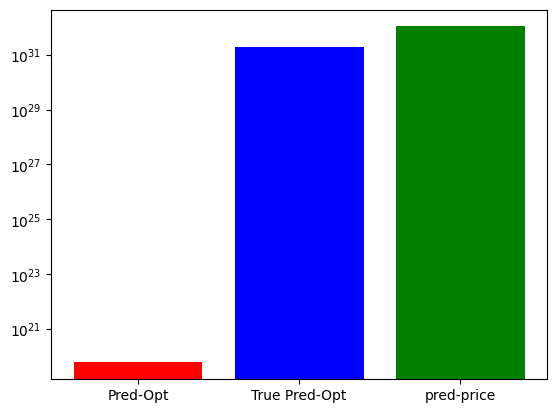

In [35]:
# optimal_salesとtrue_optimal_salesの比較(棒グラフ)(対数軸)

# 色を変更
plt.bar(
    ["Pred-Opt", "True Pred-Opt", "pred-price"],
    [optimal_sales, true_optimal_sales, dash_sales],
    color=["red", "blue", "green"],
)
plt.yscale("log")
plt.savefig("first.jpg", dpi=300)
plt.show()


In [36]:
# 学習データを正規化
X_train_std = (X_train - X_train.mean()) / X_train.std()
# テストデータを正規化
X_test_std = (X_test - X_train.mean()) / X_train.std()


In [37]:
# 正規化したデータを用いてモデルを学習
std_lr = LinearRegression()
std_lr.fit(X_train, Y_train)


LinearRegression()

In [38]:
# Nelder-Mead法を用いて最適化
result = minimize(
    objective_function,
    initial_prices,
    args=(std_lr.coef_, std_lr.intercept_),
    method="Nelder-Mead",
)


In [39]:
# 最適化された価格
std_optimal_prices = result.x
print("Optimal Prices:", std_optimal_prices)


Optimal Prices: [ 5.23321322e+14  3.76741852e+14  2.41842964e+14 -1.93041019e+14
  2.71223678e+14  5.77788889e+14 -9.41235118e+13  2.62081527e+14
  3.85022961e+12 -1.50299508e+14 -2.71030885e+15 -1.68827200e+15
 -3.60230576e+14 -9.50114653e+14 -1.20439716e+14 -9.04205928e+13
 -5.01361540e+14  1.77991898e+13 -1.25688018e+13  7.92266267e+14
  1.38784571e+14  6.98781110e+14  6.48616869e+14  2.02613555e+14
  5.47537408e+14 -2.27041554e+14  1.91208767e+14  1.08855139e+14
 -8.60563314e+13 -2.39041123e+14 -1.30327289e+15 -2.34533414e+14
  1.27801269e+15 -8.16891479e+14 -6.17846566e+13 -5.41103748e+14
  6.07068983e+14  8.38532693e+14  3.28975139e+14  1.12243322e+15
  4.13971301e+13  6.97959887e+14  2.31315673e+13  5.86176132e+14
 -7.62671644e+14 -1.60450853e+14  1.05311734e+15 -2.09746334e+14
 -6.11265605e+14  6.28876546e+14]


In [40]:
# 最適化された価格での売上
std_optimal_sales = np.dot(std_optimal_prices, std_lr.coef_) + std_lr.intercept_


In [41]:
# optimal_pricesを横一列のcsvに出力
optimal_prices = pd.DataFrame(optimal_prices)
optimal_prices.to_csv("optimal_prices.csv", index=False, header=False)


In [42]:
# df_optimal_pricesを行名をcolumnsにしたデータフレームに変換
df_optimal_prices = pd.read_csv("optimal_prices.csv", header=None)
df_optimal_prices = df_optimal_prices.T
df_optimal_prices.columns = column_names
df_optimal_prices.head()


,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_41,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50
0,5.233213e+14,3.767419e+14,2.418430e+14,-1.930410e+14,2.712237e+14,5.777889e+14,-9.412351e+13,2.620815e+14,3.850230e+12,-1.502995e+14,...,4.139713e+13,6.979599e+14,2.313157e+13,5.861761e+14,-7.626716e+14,-1.604509e+14,1.053117e+15,-2.097463e+14,-6.112656e+14,6.288765e+14


In [45]:
# df_optimal_pricesをpricesというエクセルファイルに出力

df_optimal_prices.to_excel("prices.xlsx", index=False)
